# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [2]:
#Function to create Scatter Plots with regression
def scatter_stats(x_column, y_column):
    # Find X & Y values
    x_values = x_column
    y_values = y_column

    #Create line statistics
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    #Find Regression
    regress_values = x_values * slope + intercept

    #Create Message to Display
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Create Scatter Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red") #??? Why is this not printing
    plt.xlabel(x_column.name)
    plt.ylabel(y_column.name)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() #Updated

        #Find Date
        today = date.today()
        print("Today date is: ", today)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Today date is:  2023-04-01
Processing Record 2 of Set 1 | vaini
Today date is:  2023-04-01
Processing Record 3 of Set 1 | xinmin
Today date is:  2023-04-01
Processing Record 4 of Set 1 | punta arenas
Today date is:  2023-04-01
Processing Record 5 of Set 1 | sept-iles
Today date is:  2023-04-01
Processing Record 6 of Set 1 | pevek
Today date is:  2023-04-01
Processing Record 7 of Set 1 | nizhneyansk
Today date is:  2023-04-01
City not found. Skipping...
Processing Record 8 of Set 1 | bredasdorp
Today date is:  2023-04-01
Processing Record 9 of Set 1 | cape town
Today date is:  2023-04-01
Processing Record 10 of Set 1 | tumannyy
Today date is:  2023-04-01
City not found. Skipping...
Processing Record 11 of Set 1 | dikson
Today date is:  2023-04-01
Processing Record 12 of Set 1 | luanda
Today date is:  2023-04-01
Processing Record 13 of Set 1 | albany
Today date is:  2023-04-01
Processing Re

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,281.96,61,0,9.26,AR,1680384593
1,vaini,-21.2000,-175.2000,301.24,78,40,5.14,TO,1680384780
2,xinmin,41.9908,122.8253,281.50,46,0,3.89,CN,1680384780
3,punta arenas,-53.1500,-70.9167,284.21,62,75,7.20,CL,1680384682
4,sept-iles,50.2001,-66.3821,272.44,95,100,6.69,CA,1680384616


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,281.96,61,0,9.26,AR,1680384593
1,vaini,-21.2000,-175.2000,301.24,78,40,5.14,TO,1680384780
2,xinmin,41.9908,122.8253,281.50,46,0,3.89,CN,1680384780
3,punta arenas,-53.1500,-70.9167,284.21,62,75,7.20,CL,1680384682
4,sept-iles,50.2001,-66.3821,272.44,95,100,6.69,CA,1680384616


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

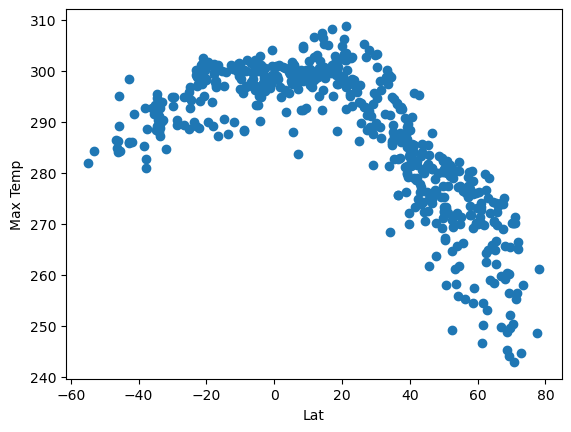

In [5]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])
plt.xlabel("Lat")
plt.ylabel("Max Temp")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

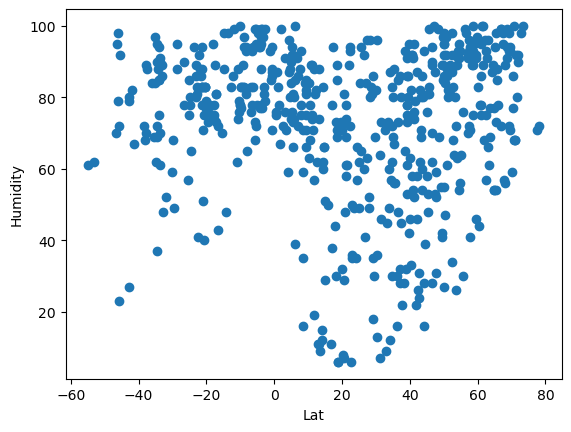

In [6]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])
plt.xlabel("Lat")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

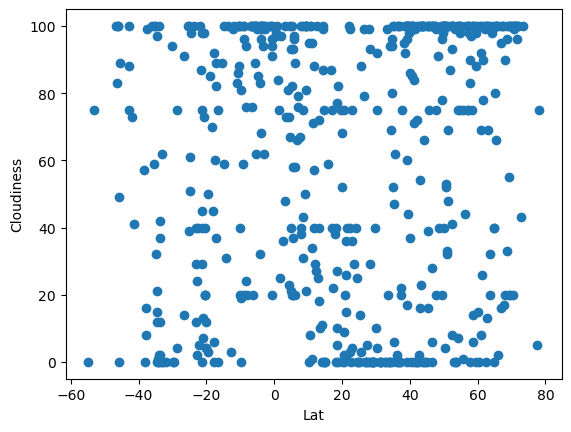

In [7]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])
plt.xlabel("Lat")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

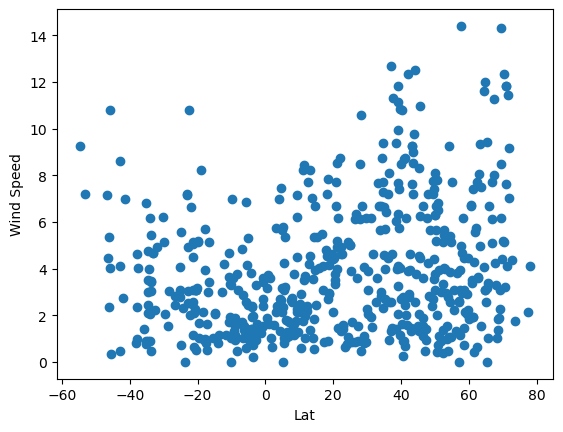

In [8]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])
plt.xlabel("Lat")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [9]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,xinmin,41.9908,122.8253,281.50,46,0,3.89,CN,1680384780
4,sept-iles,50.2001,-66.3821,272.44,95,100,6.69,CA,1680384616
5,pevek,69.7008,170.3133,249.50,93,100,4.41,RU,1680384781
8,dikson,73.5069,80.5464,257.98,100,100,1.74,RU,1680384782
10,albany,42.6001,-73.9662,295.25,31,2,3.96,US,1680384601


In [10]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,281.96,61,0,9.26,AR,1680384593
1,vaini,-21.2000,-175.2000,301.24,78,40,5.14,TO,1680384780
3,punta arenas,-53.1500,-70.9167,284.21,62,75,7.20,CL,1680384682
6,bredasdorp,-34.5322,20.0403,289.21,95,0,2.09,ZA,1680384782
7,cape town,-33.9258,18.4232,290.99,85,0,6.17,ZA,1680384350


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7612766303743538


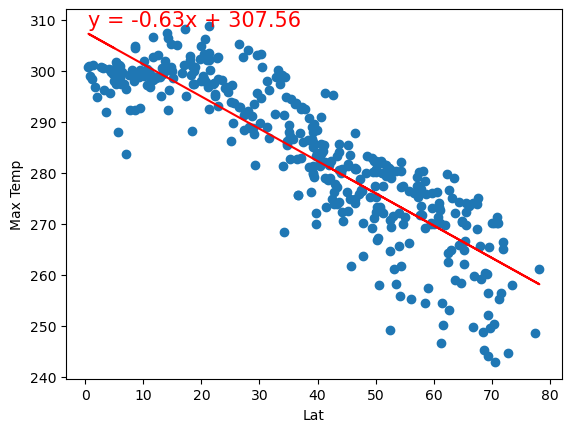

In [37]:
# Linear regression on Northern Hemisphere
scatter_stats(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

The r-squared is: 0.46065240215122255


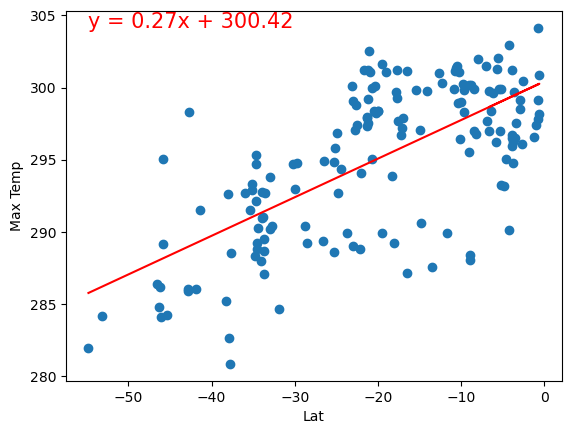

In [38]:
# Linear regression on Southern Hemisphere
scatter_stats(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** As values get closer to 0 on the x-axis (Latitude), Max Temp increases. The closer a point is to the equator (Latitude 0), the higher the Max Temp is likely to be.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04593923840264957


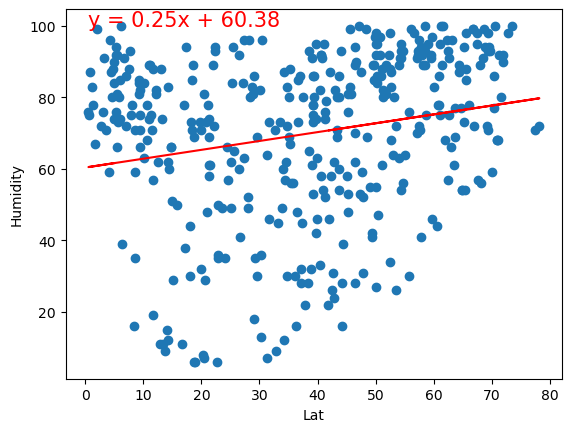

In [39]:
# Northern Hemisphere
scatter_stats(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-squared is: 0.10921055973813538


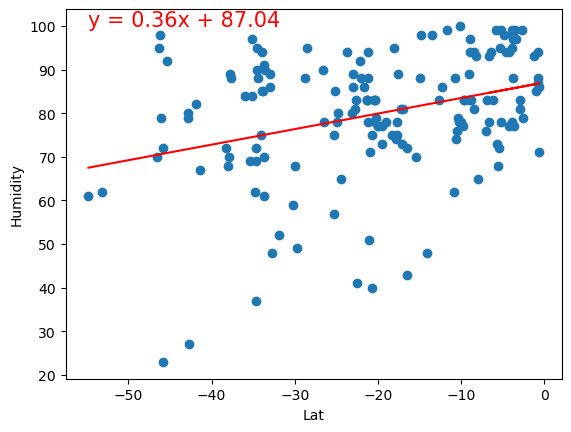

In [40]:
# Southern Hemisphere
scatter_stats(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** Humidity is increasing as Latitude gets higher. The Humidity is slightly higher in the Northern Hemisphere as the data points move away from the equator. In the Southern Hemisphere, the reverse happens: Humidity increase slightly as data points approach the equator. This change in Humidity based on Latitude has a very week relation.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.035528300684091865


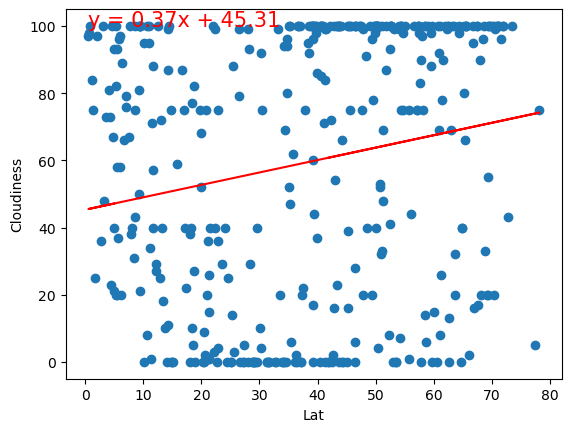

In [41]:
# Northern Hemisphere
scatter_stats(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-squared is: 0.10391627573194401


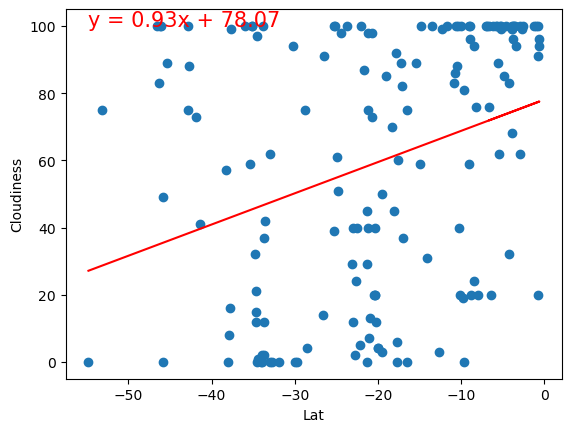

In [42]:
# Southern Hemisphere
scatter_stats(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** In the Southern Hemisphere, Cloudiness increased slightly as Latitude approached the equator. In the Northern Hemisphere, Cloudiness increased slightly as data points moved away from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.041632884693411885


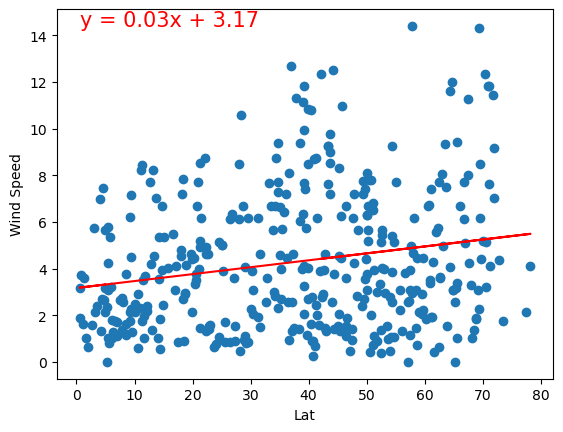

In [43]:
# Northern Hemisphere
scatter_stats(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-squared is: 0.12736596908756984


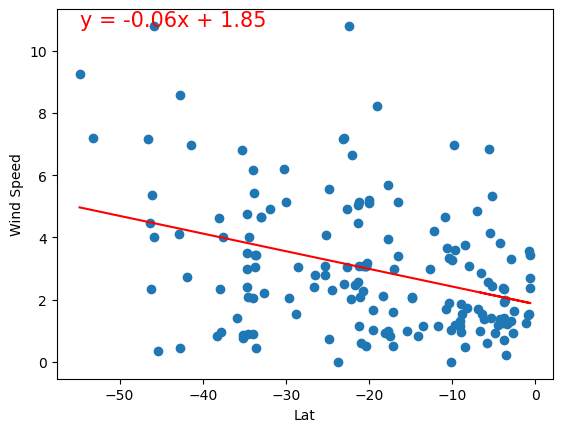

In [44]:
# Southern Hemisphere
scatter_stats(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** Wind speed decreased slightly as data points approached the equator. 